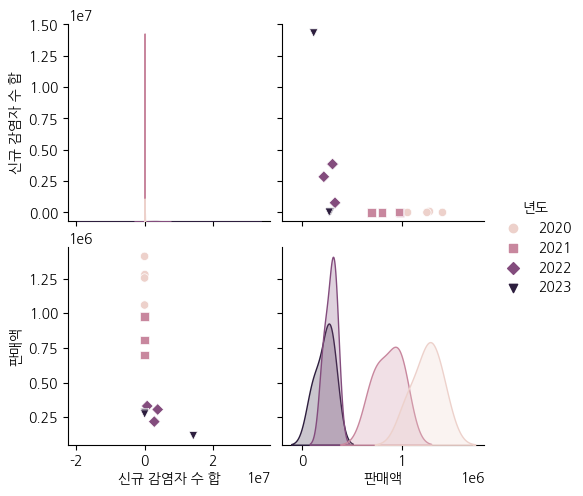

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family']='NanumGothic'

# 2022년 4분기 데이터 제거
# 두 개의 CSV 파일을 읽어오기
covid_data = pd.read_csv('중국_코로나.csv')
sales_data = pd.read_csv('중국_판매액.csv')

# 두 데이터프레임을 '연도'와 '분기'를 기준으로 병합
merged_data = pd.merge(covid_data, sales_data, on=['년도', '분기'], how='inner')

# pariplot 그리기
sns.pairplot(merged_data, vars=['신규 감염자 수 합', '판매액'], hue='년도', markers=["o", "s", "D", "v"])

# 그래프 표시
plt.show()

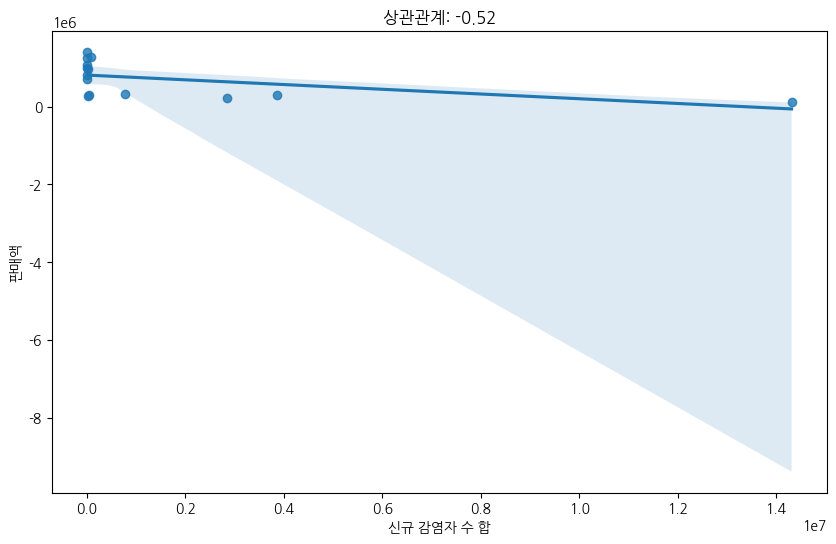

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df1 = pd.read_csv('중국_코로나.csv')
df2 = pd.read_csv('중국_판매액.csv')

# 두 데이터프레임을 연도와 분기를 기준으로 병합
merged_df = pd.merge(df1, df2, on=['년도', '분기'])

# 상관관계 계산
correlation = merged_df['신규 감염자 수 합'].corr(merged_df['판매액'])

plt.figure(figsize=(10, 6))
# # 산점도와 회귀선 그리기
sns.regplot(x='신규 감염자 수 합', y='판매액', data=merged_df)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 처리 설정
plt.title(f'상관관계: {correlation:.2f}')
plt.show()

In [46]:
import statsmodels.api as sm

# 독립변수와 종속변수 설정
X = sm.add_constant(merged_df['신규 감염자 수 합'])  # 독립변수에 상수항 추가
y = merged_df['판매액']

# 선형 회귀 모델 생성
model = sm.OLS(y, X)

# 모델 피팅
results = model.fit()
# 회귀분석 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    판매액   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     4.440
Date:                Thu, 07 Dec 2023   Prob (F-statistic):             0.0568
Time:                        19:23:55   Log-Likelihood:                -199.45
No. Observations:                  14   AIC:                             402.9
Df Residuals:                      12   BIC:                             404.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.091e+05   1.17e+05      6.936      0.0

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


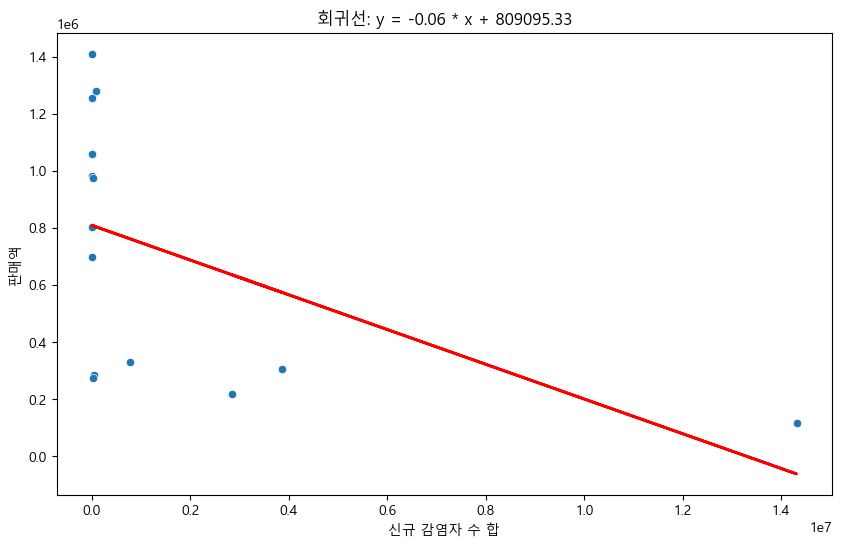

In [48]:
import numpy as np

# 회귀계수와 절편 추출
slope = results.params['신규 감염자 수 합']
intercept = results.params['const']

# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='신규 감염자 수 합', y='판매액', data=merged_df)
plt.plot(merged_df['신규 감염자 수 합'], slope * merged_df['신규 감염자 수 합'] + intercept, color='red', linewidth=2)
plt.title(f'회귀선: y = {slope:.2f} * x + {intercept:.2f}')
plt.show()